Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [ ]:
COLLABORATORS = ""

## To receive credit for this assignment, you must also fill out the [AI Use survey](https://forms.gle/ZhR5k8TdAeN8rj4CA)


---

In [1]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 1:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object `f` and its approximation `F`.  Note, both `f` and `F` can be numpy arrays.

In [2]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    
    # Absolute error
    e = numpy.abs (f - F)

    # Relative error
    r = e/numpy.abs(f)
    
    # integer array of precision - based on 04_error_solution.ipynb lecture notes but modified for use with array:
    # p = int(-numpy.log10(r/5.))  <-- not for array
    p = numpy.where(r >0, numpy.floor(-numpy.log10(r/5.)), numpy.inf).astype(int)

    return e, r, p


In [ ]:
# you can test your code here

In [3]:
# Testing Cell (do not copy)

# Test Simple Scalars
e,r,p = errors(numpy.exp(1),2.72)
answer = [0.0017181715409551046, 0.0006320799863232398, 3]
numpy.testing.assert_allclose([e,r,p], answer)
print('passed scalar test')

# Test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('passed array test')

passed scalar test
passed array test


**(b)** [2 pts]  Use your routine to compare the absolute error, relative error and degree of precision for these two rational approximations of $\pi$

* $f = \pi$ and $F = 22 / 7$
* $f = \pi$ and $F = 355 / 113$

Which is more accurate?

In [4]:
# you can put some working code here to generate your answers, but put your answers in the cell below
f = numpy.array([numpy.pi, numpy.pi]) 
F = numpy.array([(22/7), (355/113)]) 

e, r, p = errors(f, F) 
print("Absolute errors:", e) 
print("Relative errors:", r) 
print("Decimal precisions:", p)

print(355/113)
print(numpy.pi)


Absolute errors: [1.26448927e-03 2.66764189e-07]
Relative errors: [4.02499435e-04 8.49136788e-08]
Decimal precisions: [4 7]
3.1415929203539825
3.141592653589793


355/113 as shown by more digits of precision

**(c)** [6 pts] Write a python routine to find the most accurate $d$ digit rational approximation to $\pi$. i.e. find
two $d$ digit positive integers $m,n$ such that 

$$ F = \frac{m}{n} \sim \pi$$

(hint:  $355/113$ is the best 3-digit rational approximation)

In [5]:
def rational_pi(d):
    ''' Find the best rational approximation to pi ~ m/n where m and n are both d-digit positive integers
    
    Parameters
    ----------
    
    d: int
        number of digits in both m and n
    
    Returns
    -------
    m,n: int
        numerator and denominator of best d digit rational approximation to pi ~ m/n
        
    '''
    # d will be a parameter passed into this function
    # d = range(1,6)]
    
    # Office Hours 
    # The obvious thing to jump to is a double loop, but you know more about this problem that you don't have to loop over m and n
    # The problem is approximate by a rational function where the only constraints are:
    #   - m and n are integers
    #   - m and n both have the same number of digits
    # Hint: don't loop over m and n as independent objects, because you can immediately figure out that there are lots of combinations
    # that are so far away from pi and you can get rid of those.
    # If you can do these numpy array, that's the way you should think. That will be enormously faster.

    # Define m and n
    
    # Set n (fixed) and generate m  - to account for office hours hint of not treating m and n as independent objects
    #   n and m are positive digits with exactly d digits
    #       n belongs to the interval [10^(d-1), 10^d - 1]
    #       m belongs to the interval [10^(d-1), 10^d - 1
    # --- From documentation
    #       numpy.arange([start, ]stop, [step, ]dtype=None, *, device=None, like=None)
    #           Return evenly spaced values within a given interval. 
    #           For integer arguments the function is roughly equivalent to the Python built-in range, 
    #           but returns an ndarray rather than a range instance. 
    #           When using a non-integer step, such as 0.1, it is often better to use numpy.linspace.
    # ---
    #           The stop is exclusive, so if you want to include it, +1

    start = 10**(d-1)
    stop = 10**(d)-1
    n = numpy.arange(start,stop+1)
   
    #   If we fix n, then we want the m that minimizes abs(pi - (m/n)) or abs(pi*n - m)
    #
    # numpy.rint(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature]) = <ufunc 'rint'>
    #   Round elements of the array to the nearest integer.
    #   For values exactly halfway between rounded decimal values, NumPy rounds to the nearest even value. 
    #   Thus 1.5 and 2.5 round to 2.0, -0.5 and 0.5 round to 0.0, etc.
    # 
    #   np.rint rounds elementwise to the nearest integer (but still returns a NumPy array of floats)
    #   .astype(int) converts float64 to int64
    

    m_initial = numpy.rint(n*numpy.pi).astype(int)

    # Additionally in order to minimize the fractional error |pi-(m/n)|, I also check m_initial-1 and m_initial+1
    # I will put that into a 2D array.
    # m_contenders has shape (3, len(n)): 3 candidates per denominator

    m_contenders = numpy.vstack([m_initial-1, m_initial, m_initial+1])

    # I need to ensure m_contenders are positive integers of d digits
    #   Note: for numpy.arange I used stop+1 because the endpoint is excluded
    #   but for constraints I can just use <= stop because the <= does include the endpoint

    m_digits = (m_contenders >= start) & (m_contenders <= stop)

    # I also want to home in pi with my m_contenders
    #   Pi belongs to the interval (3,4)
    #   m/n is between 3 and 4
    #   3n <= m <= 4
    m_inpirange = (m_contenders >= 3*n) & (m_contenders <= 4*n)

    # Both constraints applied
    m_validate = m_digits & m_inpirange

    # Compose fractions 
    fractions = m_contenders/n
    
    # build an array of n values that fit the interval
    # define a candidate set that is a numpy array with values from m = round (pi*n)

    # Calculate absolute error
    
    e = numpy.abs(numpy.pi - fractions)

    # Remove invalid m contenders
    # For every invalid candidate, set its error to infinity so it’s automatically disqualified.

    e[~m_validate] = numpy.inf

    # Calculate relative error with n and m

    r = e/abs(numpy.pi)

    # Calculate integer array of precision 
    p = numpy.where(r >0, numpy.floor(-numpy.log10(r/5.)), numpy.inf)


    # Get index of the smallest error
    smallest_index = numpy.argmin(e)

    # Need to account for shape change of array and adjust
    winner_row, winner_col = numpy.unravel_index(smallest_index, e.shape)

    # Grab the winning m and n
    m = m_contenders[winner_row, winner_col]
    n = n[winner_col]
    
    return m, n 

In [6]:
# Testing Cell (do not copy)

# print out best rational approximations and their errors  for d =1-5
for d in range(1,6):
    m,n = rational_pi(d)
    e,r,p = errors(numpy.pi,m/n)
    print('d={}: {}/{} = {}:\t e = {},\t, r = {},\t p= {}'.format(d,m,n,m/n,e,r,p))
    
# Run assertion Tests
numpy.testing.assert_allclose(rational_pi(2),(44, 14))
numpy.testing.assert_allclose(rational_pi(3),(355, 113))
print('\nsuccess!')


d=1: 3/1 = 3.0:	 e = 0.14159265358979312,	, r = 0.04507034144862795,	 p= 2
d=2: 44/14 = 3.142857142857143:	 e = 0.0012644892673496777,	, r = 0.0004024994347707008,	 p= 4
d=3: 355/113 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=4: 3195/1017 = 3.1415929203539825:	 e = 2.667641894049666e-07,	, r = 8.49136787674061e-08,	 p= 7
d=5: 99733/31746 = 3.1415926415926414:	 e = 1.1997151716514054e-08,	, r = 3.818811997413258e-09,	 p= 9

success!


**(d)** [6 pts] $F = n \log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

**Note**: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  

**Hint**: However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

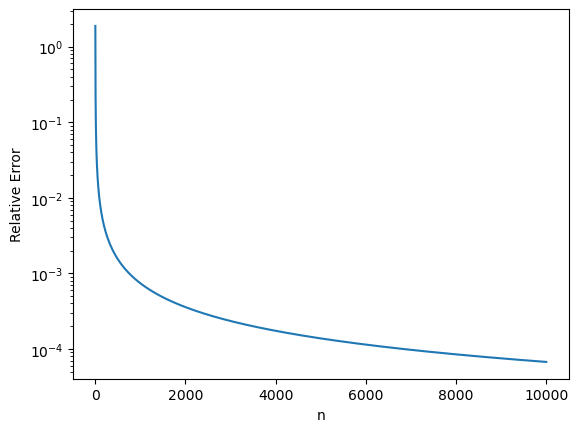

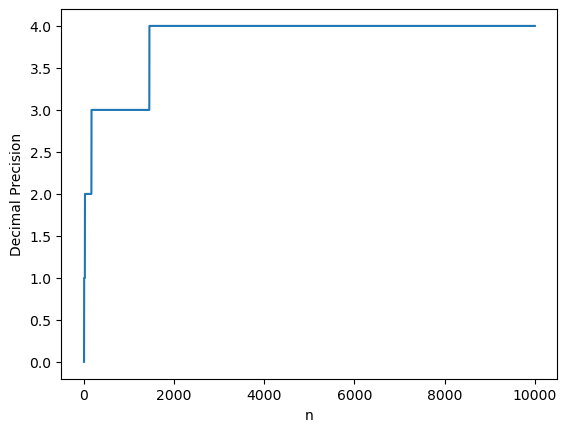

Smallest n where Stirling's approximation gives 4+ decimal places of precision: 1452


In [23]:
# choose N (e.g., 10000)
N = 10000
n = numpy.arange(2, N+1, dtype=float)



# true log(n!) via cumulative sum of logs
# f = numpy.cumsum(numpy.log(n))              # shape (N,)
f = numpy.cumsum(numpy.log(numpy.arange(1, N+1)))[1:]  # same length as n


# Stirling (crude) approximation
F = n * numpy.log(n) - n

# errors
e = numpy.abs(f - F)
r = e/numpy.abs(f)

# decimal precision (guard zeros)
p = numpy.where(r > 0, numpy.floor(-numpy.log10(r/5.)), numpy.inf)

# plotting (two separate figures is fine)
# plt.figure(); plt.plot(n, rel_err); plt.yscale('log'); ...
# plt.figure(); plt.plot(n, p); ...
plt.figure()
plt.plot(n, r)
plt.yscale('log')
plt.xlabel("n")
plt.ylabel("Relative Error")

plt.figure()
plt.plot(n, p)
plt.xlabel("n")
plt.ylabel("Decimal Precision")

plt.show()


if not numpy.any(p >= 4):
    print("No n ≤", N, "achieves 4 decimal places.")
else:
    idx = numpy.argmax(p >= 4)
    n_star = int(n[idx])
    print("Smallest n where Stirling's approximation gives 4+ decimal places of precision:", n_star)


Computing log(n!) as log(factorial(n)) overflows in float64 at n≥171 because n! exceeds the largest representable number (≈1.8×10^308). The intermediate n! is not computable in floating point.

In [22]:
from scipy.special import factorial

# test n from 1 to 200
ns = numpy.arange(1, 201)

# Naive: log(factorial(n)) using floats
naive = []
for k in ns:
    try:
        val = numpy.log(factorial(k, exact=False))  # float factorial
    except Exception:
        val = numpy.nan
    naive.append(val)
naive = numpy.array(naive)

# Stable: cumulative sum of logs
stable = numpy.cumsum(numpy.log(ns))  # equals log(n!) for n>=1

# Where does naive blow up?
overflow_at = ns[numpy.isinf(naive)][0]   # should be 171

print("Naive method overflows starting at n =", overflow_at)

# Show a few values side by side
for k in [10, 50, 100, 170]:
    print(f"n={k:3d}: naive={naive[k-1]:.3f}, stable={stable[k-1]:.3f}")

print(f"n=171: naive={naive[170]}, stable={stable[170]:.3f}")


Naive method overflows starting at n = 171
n= 10: naive=15.104, stable=15.104
n= 50: naive=148.478, stable=148.478
n=100: naive=363.739, stable=363.739
n=170: naive=706.573, stable=706.573
n=171: naive=inf, stable=711.715


## Question 2:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

**My Answer:** 
**See Office Hours notes**

With $x>0$, bound the *relative truncation error* when approximating $e^x$ by its degree–$n$ Taylor polynomial  

$$
T_n(x)=\sum_{k=0}^{n}\frac{x^k}{k!}.
$$

**Remainder (Lagrange form).** For a $C^{n+1}$ function,

$$
e^x - T_n(x) \;=\; R_{n+1}(x)
= \frac{f^{(n+1)}(\xi)}{(n+1)!}\,x^{n+1}
\quad\text{for some } \xi\in(0,x).
$$

For $f(x)=e^x$, all derivatives equal $e^t$, so

$$
R_{n+1}(x)=\frac{e^{\xi}}{(n+1)!}\,x^{n+1}, \qquad 0<\xi<x.
$$

**Monotonicity for $x>0$.** Since $0<\xi<x$ and $e^t$ is increasing,

$$
e^{\xi}\le e^{x}.
$$

**Relative error bound.**

$$
r_n
=\frac{|e^x-T_n(x)|}{|e^x|}
=\frac{|R_{n+1}(x)|}{e^x}
\le \frac{e^{x}x^{n+1}/(n+1)!}{e^{x}}
= \frac{|x|^{\,n+1}}{(n+1)!}, \quad (x>0).
$$

*Comment:* This is a pure truncation-error estimate from the Taylor remainder; machine epsilon comes later when we choose $n$ so that this bound is at or below the desired numerical tolerance.


**(b)** [4 pts] Analytically show that for **large** $x\gg1$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need *approximately* $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$ (and then this problem is still a bit tricky)

We want the degree–$n$ Taylor truncation to meet a target relative error $\varepsilon$:

$$
r_n \le \frac{x^{n+1}}{(n+1)!} \le \varepsilon, \qquad x>0.
$$

Let $m=n+1$. Taking logs and using Stirling in log form,

$$
\log\!\frac{x^m}{m!}
\;\approx\;
m\log x - (m\log m - m)
= m\left[1+\log\!\left(\tfrac{x}{m}\right)\right]
=: g(m).
$$

The bracket changes sign at $1+\log(x/m)=0 \iff m=e\,x$.  
Thus $g(m)>0$ for $m<e x$ (too large to satisfy $\log\varepsilon<0$), and $g(m)<0$ for $m>e x$.  
Hence to drive the error below $\varepsilon$ we need

$$
m=n+1 \;\gtrsim\; e\,x \quad \Rightarrow \quad n \;\gtrsim\; e\,x.
$$

A first-order refinement linearizing $g$ at $m=e x$ (where $g'=-1$) gives

$$
m \approx e\,x - \log \varepsilon
\;\Rightarrow\;
n \approx e\,x - \log \varepsilon - 1,
$$

so for float64 ($-\log \varepsilon \approx 36$) one expects $n \approx e\,x + 35$.


**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $T_n(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_n(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [ ]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return Tn, MAX_N

In [ ]:
# Feel free to test your code here and/or make a plot of errors

In [ ]:
# Testing Cell (do not copy)

x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

YOUR ANSWER HERE

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

## Question 3

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine,  let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-3, 3]$ (and we'll pretend DNA has a sign bit...chirality?).

**(a)** [4 pts] How many numbers can we represent with this floating point system (assume it's normalized)?  What are the underflow and overflow limits? What is machine Epsilon?

YOUR ANSWER HERE

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**(c)** [4 pts] For the same  range of $E$, estimate the ratio of numbers that can be stored in  $p$ base-pairs (base 4) versus $p$ bits (base 2).  Check your answer against the given problem with $p=3$ and $E\in[-3,3]$

In [ ]:
# some noodle space for calculations if you want

YOUR ANSWER HERE